# **Products Detection**


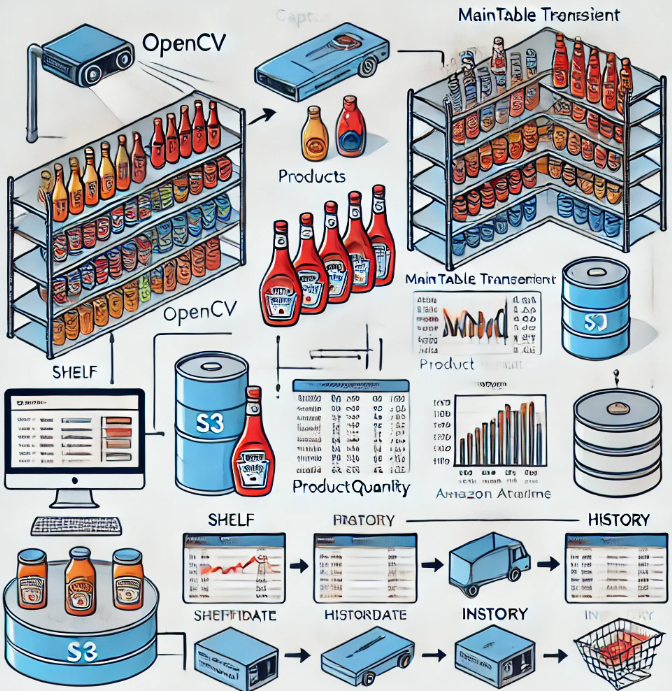

In [1]:
from IPython.display import Image
Image(r"/content/work flow.png")

## **Step 1 : Webcam for Automated process to take picture after every hour**


In [ ]:
import cv2

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        print(check)
        print(frame)
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)

        x = 'l'
        if key == ord('s'):
#        if key == l:
            cv2.imwrite(filename=r'C:\Users\anupa\Downloads\trends_photos\saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread(r'C:\Users\anupa\Downloads\trends_photos\saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Image saved!")

            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break

    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break


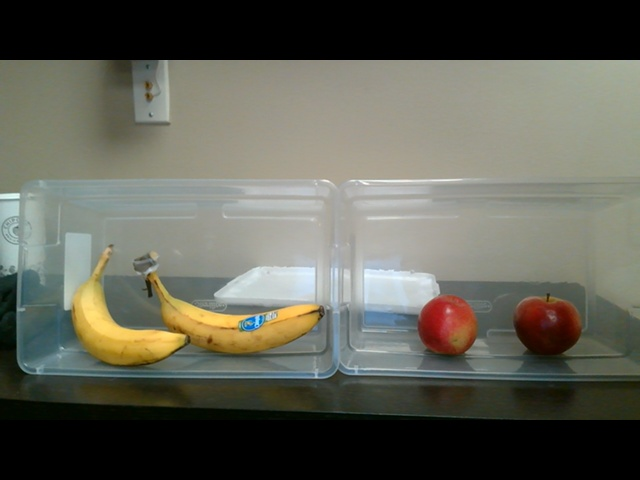

In [ ]:
Image(r"C:\Users\anupa\Downloads\trends_photos\saved_img.jpg")

## **Step 2 : Sending the pictures to S3**

In [ ]:
import boto3
import pandas as pd
import datetime
session = boto3.session.Session(profile_name = 'admin_trends_1')
client = session.client('rekognition')
SOURCE_FILENAME = r'C:\Users\anupa\Downloads\trends_photos\saved_img.jpg'
BUCKET_NAME = 'trends-nirvana'

## **Step 3 : Amazon Rekognition**

In [ ]:

s3 = session.resource('s3')
s3.meta.client.upload_file(Filename = SOURCE_FILENAME, Bucket = BUCKET_NAME, Key = 'saved_img.jpg')
bucketname = 'trends-nirvana'
filename = 'saved_img.jpg'
s3 = session.resource('s3')
response = client.detect_labels(Image={'S3Object':{'Bucket':bucketname,
                                                   'Name':filename}})

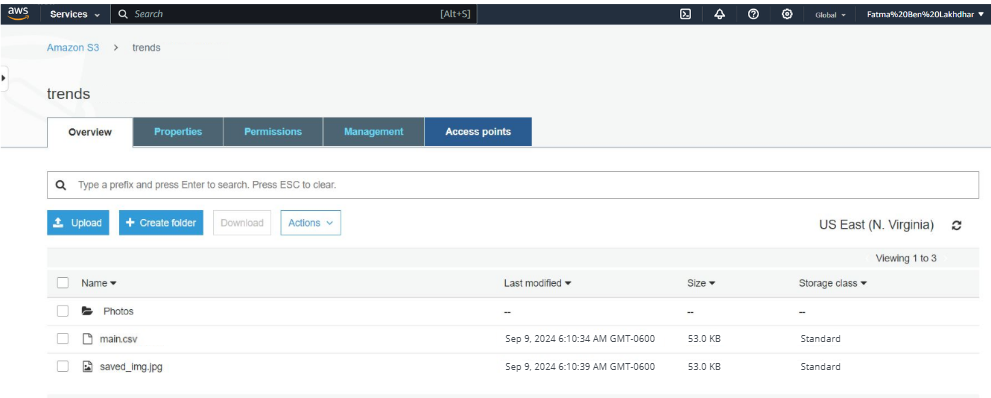

In [2]:
Image(r"/content/aws.png")

## **Step 4 : Uploading the results to Athena tables**

In [ ]:
l = list()
l1 = list()

for i in response['Labels']:
    l.append(str(datetime.datetime.now().date()))
    l.append(str(datetime.datetime.now().time()))
    l.append(i['Name'])
    l.append(len(i['Instances']))
    l1.append(l)

    l = list()
df = pd.DataFrame(l1, columns = ['date',
                            'time',
                            'label',
                                'count'])
df= df[df['label'].isin(['Apple','Ketchup', 'Banana'])]
prod_id = {'Apple':1,'ketchup':2,'Banana':4}
shelf_id = {'Apple':1001,'ketchup':1002,'Banana':1004}
df['shelf'] = df['label'].map(shelf_id)
df['prod_id'] = df['label'].map(prod_id)
df.to_csv(r'C:\Users\anupa\Downloads\trends_photos\main_table.csv')
SOURCE_FILENAME = r'C:\Users\anupa\Downloads\trends_photos\saved_img.jpg'
BUCKET_NAME = 'trendsdatabase'

s3 = session.resource('s3')
s3.meta.client.upload_file(Filename = SOURCE_FILENAME, Bucket = BUCKET_NAME, Key = 'main-table.csv')

In [ ]:
df